In [1]:
import pandas as pd

df = pd.read_csv("/content/expected_ctc.csv")  # Load the CSV file
df.head()  # Show first 5 rows of the data


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


In [2]:
columns_to_drop = ['PHD_Specialization', 'University_PHD', 'Passing_Year_Of_PHD']
df_cleaned = df.drop(columns=columns_to_drop)


In [3]:
fill_unknown_cols = [
    'Department', 'Role', 'Industry', 'Organization', 'Designation',
    'Graduation_Specialization', 'University_Grad',
    'PG_Specialization', 'University_PG', 'Last_Appraisal_Rating'
]

for col in fill_unknown_cols:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")


In [4]:
year_cols = ['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG']

for col in year_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())


In [5]:
df_cleaned.isnull().sum().sort_values(ascending=False)


,0
IDX,0
Applicant_ID,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,0
Role,0
Industry,0
Organization,0
Designation,0
Education,0


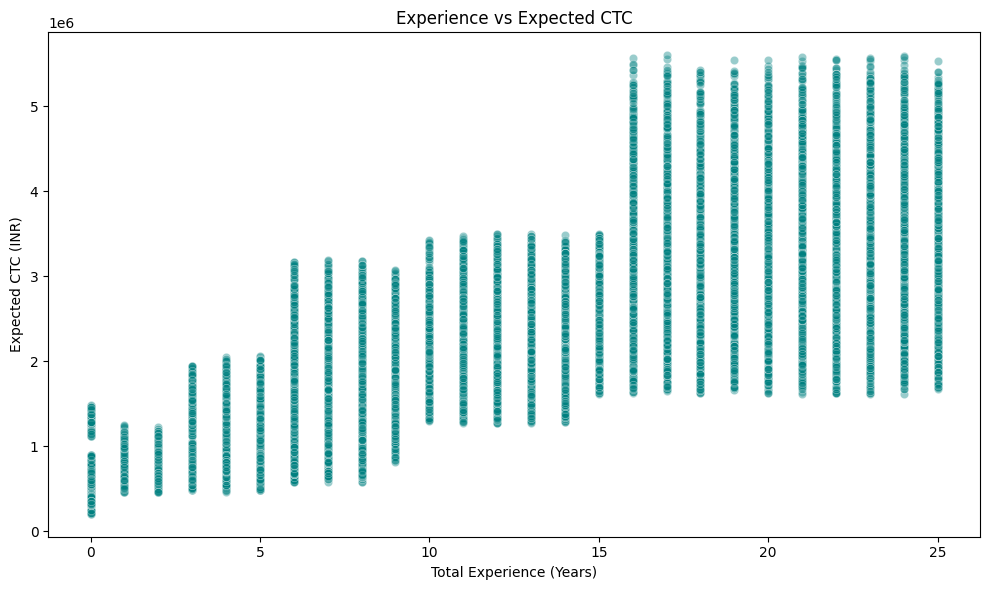

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x="Total_Experience",
    y="Expected_CTC",
    alpha=0.4,
    color="teal"
)

plt.title("Experience vs Expected CTC")
plt.xlabel("Total Experience (Years)")
plt.ylabel("Expected CTC (INR)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-4164778222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


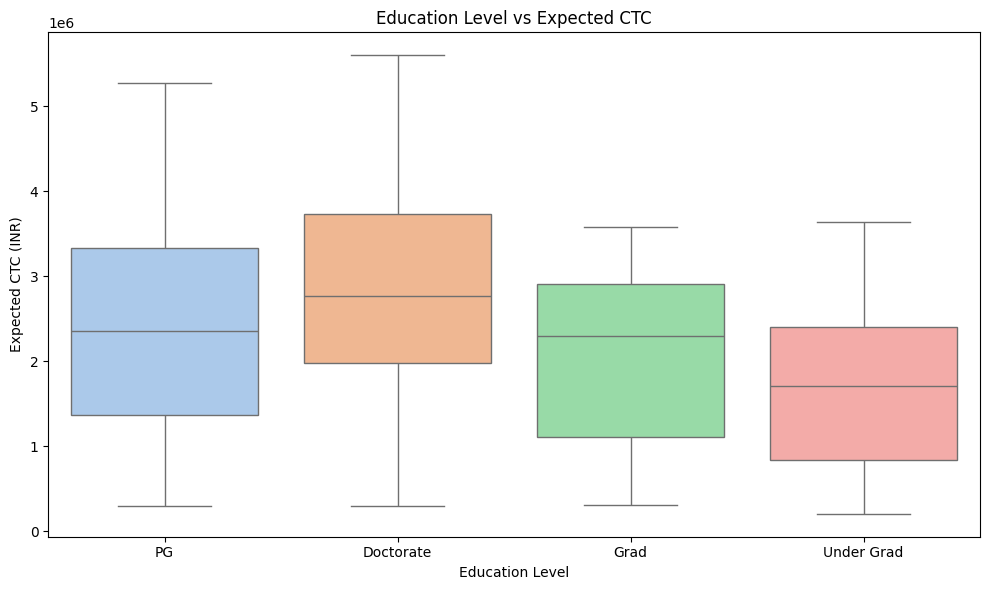

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_cleaned,
    x='Education',
    y='Expected_CTC',
    palette="pastel"
)
plt.title("Education Level vs Expected CTC")
plt.xlabel("Education Level")
plt.ylabel("Expected CTC (INR)")
plt.tight_layout()
plt.show()


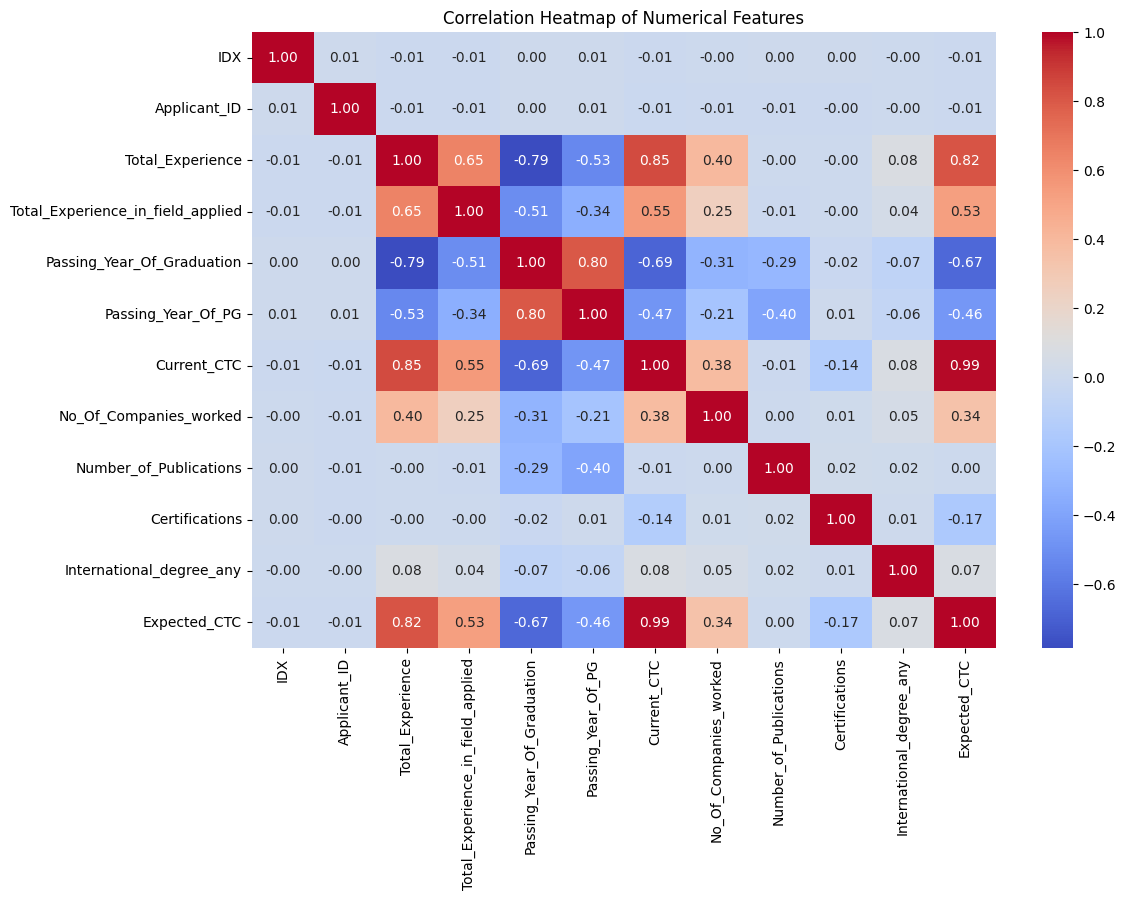

In [8]:
import numpy as np

# Select only numerical columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


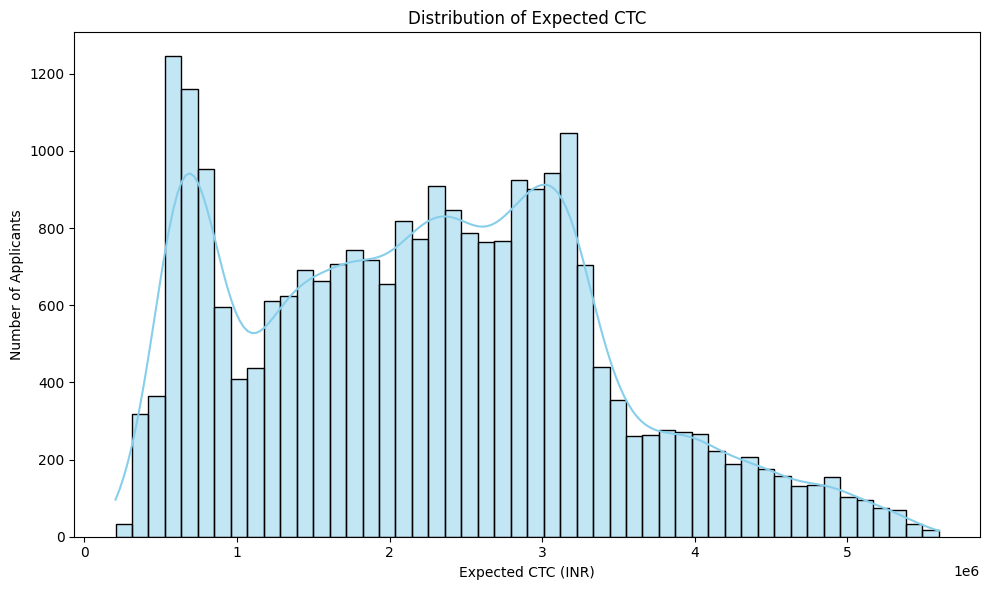

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Expected_CTC'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Expected CTC")
plt.xlabel("Expected CTC (INR)")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Copy data to avoid modifying original
df_model = df_cleaned.copy()

# Label encode all object (text) columns
label_encoders = {}
for column in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    label_encoders[column] = le


In [11]:
X = df_model.drop(columns=['Expected_CTC'])  # Features
y = df_model['Expected_CTC']                 # Target (Salary)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1010337516.9055574
R2 Score: 0.9992529721019596


In [15]:
import numpy as np

rmse = np.sqrt(1010337516.9055574)  # Or np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 31785.806846854735


In [26]:
# Show actual vs predicted salaries side-by-side
import pandas as pd

results_df = pd.DataFrame({
    'Actual CTC': y_test[:10].values,
    'Predicted CTC': y_pred[:10].round(2)
})

results_df


,Actual CTC,Predicted CTC
0,3113073,3130820.05
1,1263089,1252584.28
2,3638037,3592419.74
3,2759980,2759361.57
4,1040303,1064835.38
5,2208350,2206083.66
6,1281873,1294631.17
7,2322435,2325683.00
8,3219206,3257236.67
9,650182,614835.66


In [37]:
print("📌 Columns in X_train:")
print(list(X_train.columns))


📌 Columns in X_train:
['IDX', 'Applicant_ID', 'Total_Experience', 'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry', 'Organization', 'Designation', 'Education', 'Graduation_Specialization', 'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization', 'University_PG', 'Passing_Year_Of_PG', 'Curent_Location', 'Preferred_location', 'Current_CTC', 'Inhand_Offer', 'Last_Appraisal_Rating', 'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications', 'International_degree_any']


In [38]:
custom_candidate = {
    'Total_Experience': 6,
    'Department': 'Marketing',
    'Role': 'Sales',
    'Industry': 'IT',
    'Organization': 'Unknown',
    'Designation': 'Executive',
    'Current_CTC': 500000,
    'Education': 'PG',
    'Certifications': 1,
    'Publications': 0,
    'University_Grad': 'Unknown',
    'Graduation_Specialization': 'Unknown',
    'Passing_Year_Of_Graduation': 2015,
    'University_PG': 'Unknown',
    'PG_Specialization': 'Unknown',
    'Passing_Year_Of_PG': 2017,
    'Last_Appraisal_Rating': 'Unknown'
}


In [40]:
# Align columns safely by filling any missing columns with 0
for col in X_train.columns:
    if col not in custom_df.columns:
        custom_df[col] = 0  # or a neutral value like 'Unknown'

# Reorder properly now
custom_df = custom_df[X_train.columns]


In [41]:
predicted_ctc = model.predict(custom_df)[0]
print(f"💰 Predicted Expected CTC: ₹{int(predicted_ctc):,}")


💰 Predicted Expected CTC: ₹666,092
